In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from keras.utils import to_categorical
import seaborn as sns
import os, pathlib

In [2]:
new_base_dir = pathlib.Path('C:/Users/procns/Desktop/3-2학년 과제/인공지능개론/animal')

In [3]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / 'train',
    image_size = (180,180),
    batch_size = 32)
validataion_dataset = image_dataset_from_directory(
    new_base_dir / 'val',
    image_size = (180,180),
    batch_size = 32)
test_dataset = image_dataset_from_directory(
    new_base_dir / 'test',
    image_size = (180,180),
    batch_size = 32)

Found 1500 files belonging to 3 classes.
Found 300 files belonging to 3 classes.
Found 300 files belonging to 3 classes.


In [4]:
class_name = test_dataset.class_names
print(class_name)

['cheetah', 'jaguar', 'leopard']


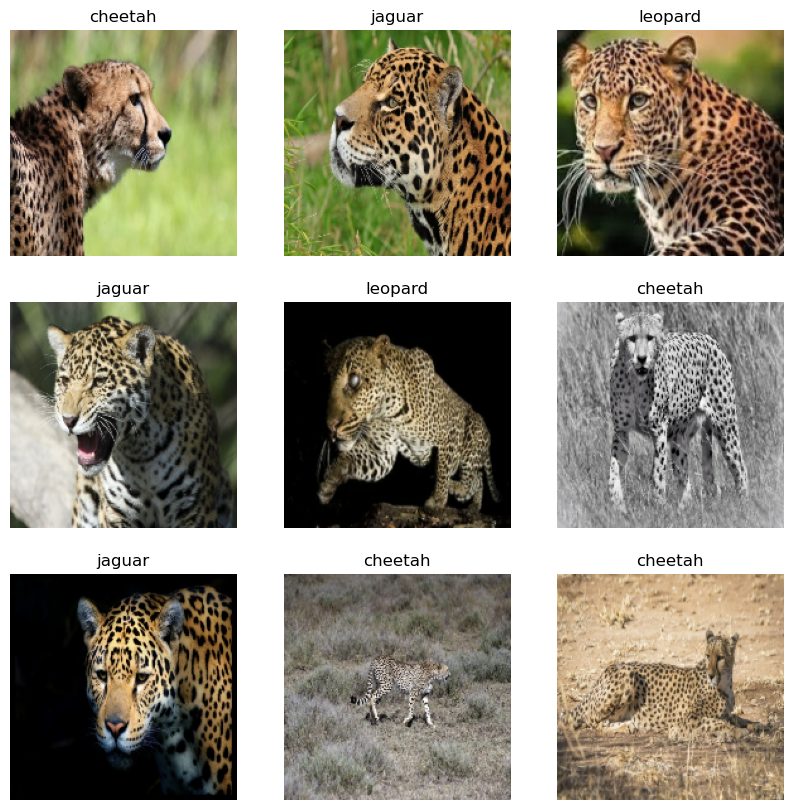

In [6]:
plt.figure(figsize=(10, 10))

for images, labels in test_dataset .take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i+1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(class_name[labels[i]])
    plt.axis('off')

In [6]:
for image_batch, label_batch in train_dataset:
  print(image_batch.shape)
  print(label_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [7]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip('horizontal'),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

In [9]:
inputs = keras.Input(shape = (180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu')(x)
x = layers.MaxPooling2D(pool_size = 2)(x)
x = layers.Conv2D(filters = 64, kernel_size = 3, activation = 'relu')(x)
x = layers.MaxPooling2D(pool_size = 2)(x)
x = layers.Conv2D(filters = 128, kernel_size = 3, activation = 'relu')(x)
x = layers.MaxPooling2D(pool_size = 2)(x)
x = layers.Conv2D(filters = 256, kernel_size = 3, activation = 'relu')(x)
x = layers.MaxPooling2D(pool_size = 2)(x)
x = layers.Conv2D(filters = 256, kernel_size = 3, activation = 'relu')(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(3, activation = 'softmax')(x)
model = keras.Model(inputs = inputs, outputs = outputs)

In [8]:
model1 = keras.models.load_model('chetah_jaguar_leopard.keras')
model1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                         

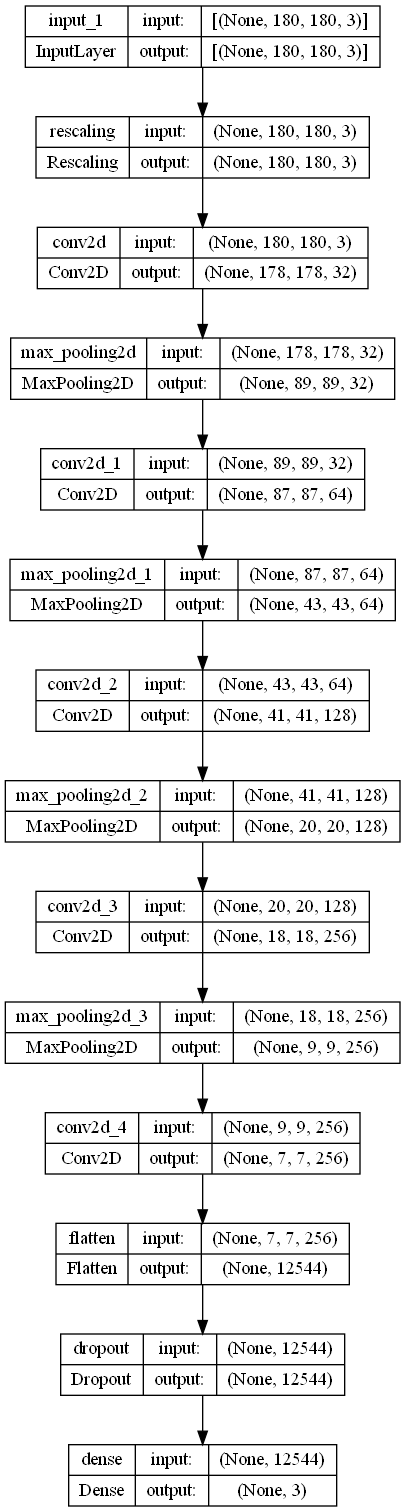

In [9]:
keras.utils.plot_model(model1, show_shapes=True)

In [11]:
model.compile(loss = 'sparse_categorical_crossentropy',
             optimizer = 'rmsprop',
             metrics = ['accuracy'])

In [12]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath = 'cheetah_jaguar_leopard2.keras',
        save_best_only = True,
        monitor = 'val_loss')
]

history = model.fit(
    train_dataset,
    epochs = 70,
    validation_data = validataion_dataset,
    callbacks = callbacks)

Epoch 1/70
47/47 [==============================] - 51s 1s/step - loss: 1.1365 - accuracy: 0.3453 - val_loss: 1.1089 - val_accuracy: 0.3333
Epoch 2/70
47/47 [==============================] - 53s 1s/step - loss: 1.1315 - accuracy: 0.3873 - val_loss: 1.0601 - val_accuracy: 0.4500
Epoch 3/70
47/47 [==============================] - 62s 1s/step - loss: 1.0670 - accuracy: 0.4813 - val_loss: 1.0227 - val_accuracy: 0.5067
Epoch 4/70
47/47 [==============================] - 55s 1s/step - loss: 0.9822 - accuracy: 0.5033 - val_loss: 1.0354 - val_accuracy: 0.3667
Epoch 5/70
47/47 [==============================] - 58s 1s/step - loss: 0.9759 - accuracy: 0.5467 - val_loss: 1.0011 - val_accuracy: 0.4600
Epoch 6/70
47/47 [==============================] - 56s 1s/step - loss: 0.8754 - accuracy: 0.5720 - val_loss: 0.9084 - val_accuracy: 0.5300
Epoch 7/70
47/47 [==============================] - 54s 1s/step - loss: 0.8301 - accuracy: 0.6160 - val_loss: 1.8717 - val_accuracy: 0.4967
Epoch 8/70
47/47 [==

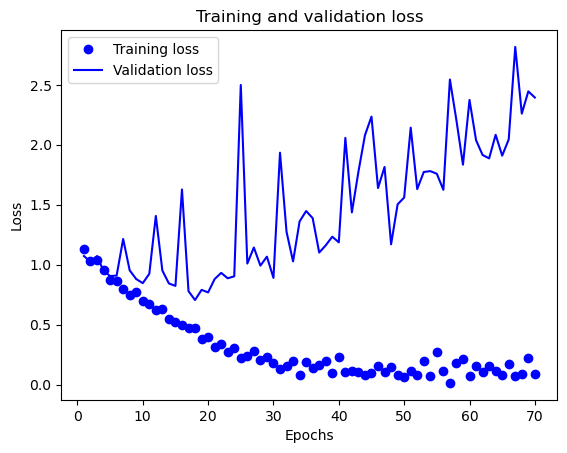

In [16]:
import matplotlib.pyplot as plt
history_dict = history.history
acc = history_dict['accuracy']

history_dict = history.history
loss_values = history_dict['loss'] 
val_loss_values = history_dict['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss') 
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend()
plt.show()

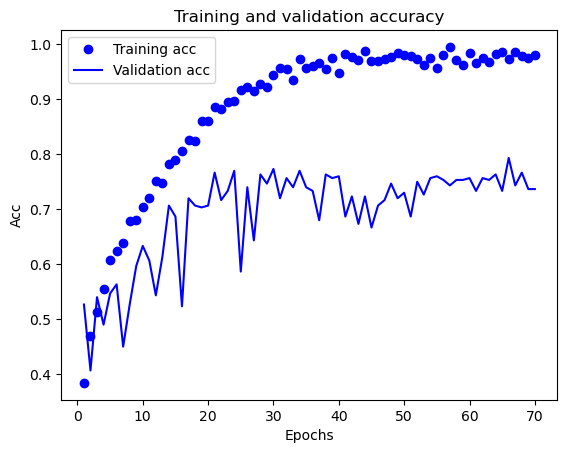

In [17]:
plt.clf() # 생성한 그래프를 clear
accuracy = history_dict['accuracy'] 
val_accuracy = history_dict['val_accuracy']
plt.plot(epochs, accuracy, 'bo', label='Training acc') 
plt.plot(epochs, val_accuracy, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.xlabel('Epochs')
plt.ylabel('Acc') 
plt.legend()
plt.show()

In [7]:
test_model = keras.models.load_model('chetah_jaguar_leopard.keras')
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f'테스트 정확도: {test_acc:.3f}')

10/10 [==============================] - 3s 212ms/step - loss: 0.5137 - accuracy: 0.7733
테스트 정확도: 0.773


In [10]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False

In [11]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [14]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(3, activation="softmax")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])


In [31]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 tf.__operators__.getitem (S  (None, 180, 180, 3)      0         
 licingOpLambda)                                                 
                                                                 
 tf.nn.bias_add (TFOpLambda)  (None, 180, 180, 3)      0         
                                                                 
 vgg16 (Functional)          (None, None, None, 512)   14714688  
                                                                 
 flatten_1 (Flatten)         (None, 12800)             0         
                                                           

In [15]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="vgg16_cheetah_jaguar_leopard.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validataion_dataset,
    callbacks=callbacks)

Epoch 1/50
47/47 [==============================] - 231s 5s/step - loss: 92.5810 - accuracy: 0.7113 - val_loss: 76.2578 - val_accuracy: 0.7400
Epoch 2/50
47/47 [==============================] - 253s 5s/step - loss: 44.3690 - accuracy: 0.8140 - val_loss: 33.1100 - val_accuracy: 0.8633
Epoch 3/50
47/47 [==============================] - 257s 5s/step - loss: 29.4826 - accuracy: 0.8513 - val_loss: 86.4786 - val_accuracy: 0.7867
Epoch 4/50
47/47 [==============================] - 262s 6s/step - loss: 25.4734 - accuracy: 0.8747 - val_loss: 135.5081 - val_accuracy: 0.7067
Epoch 5/50
47/47 [==============================] - 263s 6s/step - loss: 17.6078 - accuracy: 0.8993 - val_loss: 27.7129 - val_accuracy: 0.8667
Epoch 6/50
47/47 [==============================] - 268s 6s/step - loss: 19.1625 - accuracy: 0.8960 - val_loss: 27.2069 - val_accuracy: 0.8800
Epoch 7/50
47/47 [==============================] - 267s 6s/step - loss: 13.6279 - accuracy: 0.9133 - val_loss: 33.6966 - val_accuracy: 0.866

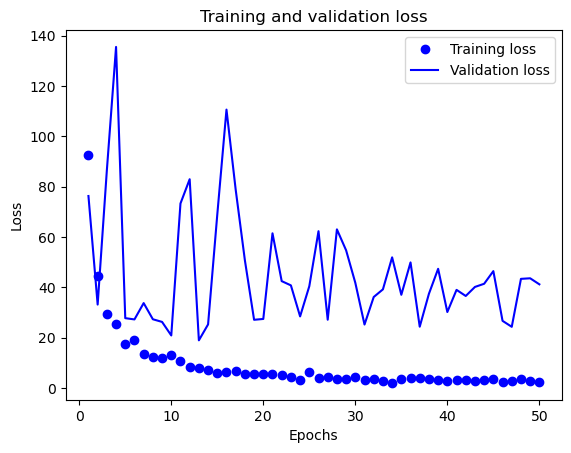

In [16]:
import matplotlib.pyplot as plt
history_dict = history.history
acc = history_dict['accuracy']

history_dict = history.history
loss_values = history_dict['loss'] 
val_loss_values = history_dict['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss') 
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend()
plt.show()

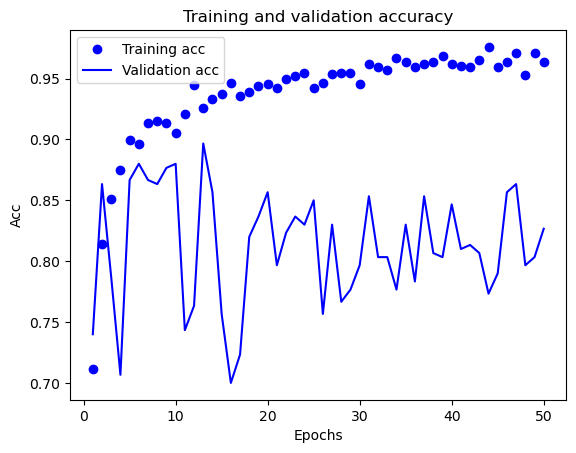

In [17]:
plt.clf() # 생성한 그래프를 clear
accuracy = history_dict['accuracy'] 
val_accuracy = history_dict['val_accuracy']
plt.plot(epochs, accuracy, 'bo', label='Training acc') 
plt.plot(epochs, val_accuracy, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.xlabel('Epochs')
plt.ylabel('Acc') 
plt.legend()
plt.show()

In [18]:
test_model = keras.models.load_model('vgg16_cheetah_jaguar_leopard.keras')
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f'테스트 정확도: {test_acc:.3f}')

10/10 [==============================] - 39s 4s/step - loss: 37.1919 - accuracy: 0.8767
테스트 정확도: 0.877


In [17]:
model = keras.models.load_model('vgg16_cheetah_jaguar_leopard.keras')

In [18]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

In [19]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 tf.__operators__.getitem (S  (None, 180, 180, 3)      0         
 licingOpLambda)                                                 
                                                                 
 tf.nn.bias_add (TFOpLambda)  (None, 180, 180, 3)      0         
                                                                 
 vgg16 (Functional)          (None, None, None, 512)   14714688  
                                                                 
 flatten_1 (Flatten)         (None, 12800)             0         
                                                           

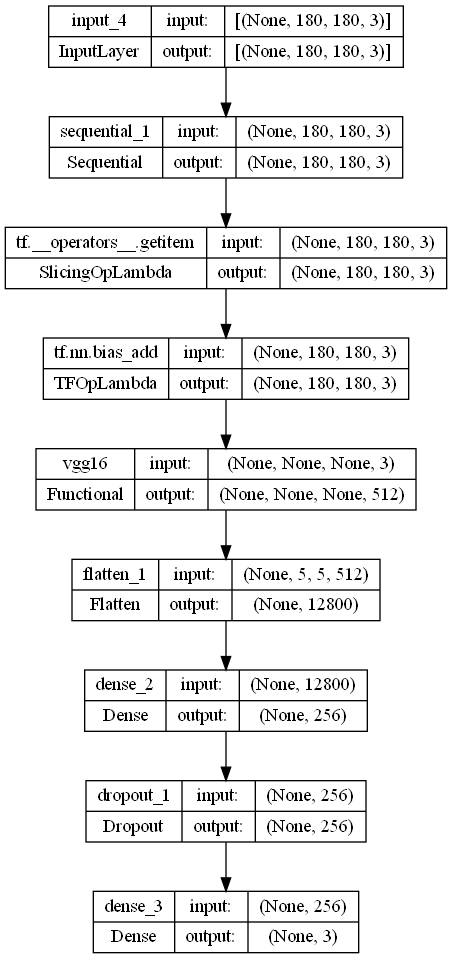

In [20]:
keras.utils.plot_model(model, show_shapes=True)

In [21]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=4e-5),
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning_cheetah_jaguar_leopard.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validataion_dataset,
    callbacks=callbacks)

Epoch 1/30
47/47 [==============================] - 289s 6s/step - loss: 5.5767 - accuracy: 0.9520 - val_loss: 26.9098 - val_accuracy: 0.8667
Epoch 2/30
47/47 [==============================] - 269s 6s/step - loss: 3.0383 - accuracy: 0.9647 - val_loss: 29.1157 - val_accuracy: 0.8667
Epoch 3/30
47/47 [==============================] - 284s 6s/step - loss: 4.0321 - accuracy: 0.9620 - val_loss: 29.2995 - val_accuracy: 0.8600
Epoch 4/30
47/47 [==============================] - 261s 6s/step - loss: 3.4354 - accuracy: 0.9613 - val_loss: 29.1967 - val_accuracy: 0.8633
Epoch 5/30
47/47 [==============================] - 262s 6s/step - loss: 3.0339 - accuracy: 0.9640 - val_loss: 29.4650 - val_accuracy: 0.8600
Epoch 6/30
47/47 [==============================] - 277s 6s/step - loss: 2.8253 - accuracy: 0.9593 - val_loss: 28.9915 - val_accuracy: 0.8533
Epoch 7/30
47/47 [==============================] - 270s 6s/step - loss: 3.2242 - accuracy: 0.9680 - val_loss: 27.5071 - val_accuracy: 0.8600
Epoch 

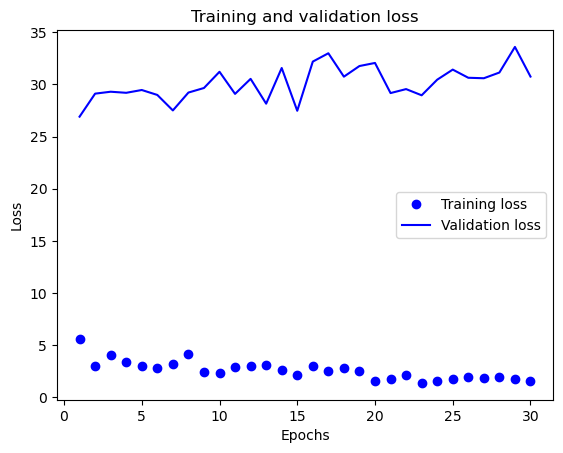

In [22]:
import matplotlib.pyplot as plt
history_dict = history.history
acc = history_dict['accuracy']

history_dict = history.history
loss_values = history_dict['loss'] 
val_loss_values = history_dict['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss') 
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend()
plt.show()

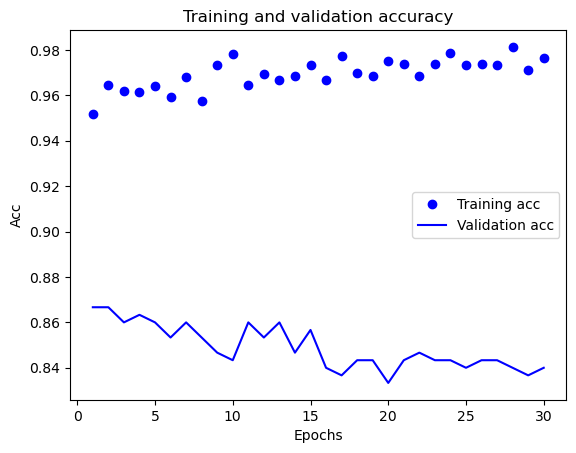

In [23]:
plt.clf() # 생성한 그래프를 clear
accuracy = history_dict['accuracy'] 
val_accuracy = history_dict['val_accuracy']
plt.plot(epochs, accuracy, 'bo', label='Training acc') 
plt.plot(epochs, val_accuracy, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.xlabel('Epochs')
plt.ylabel('Acc') 
plt.legend()
plt.show()

In [ ]:
test_model = keras.models.load_model('fine_tuning_cheetah_jaguar_leopard.keras')
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f'테스트 정확도: {test_acc:.3f}')

 6/10 [=================>............] - ETA: 20s - loss: 44.6379 - accuracy: 0.8281